In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import os

# Define paths to the datasets
base_paths = {
    'aragon': '/content/drive/MyDrive/Egalitarian DAOs/datasets/raw data/aragon',
    'daohaus': '/content/drive/MyDrive/Egalitarian DAOs/datasets/raw data/daohaus',
    'daostack': '/content/drive/MyDrive/Egalitarian DAOs/datasets/raw data/daostack',
    'snapshot': '/content/drive/MyDrive/Egalitarian DAOs/datasets/raw data/snapshot',
    'tally': '/content/drive/MyDrive/Egalitarian DAOs/datasets/raw data/tally',
    'realms': '/content/drive/MyDrive/Egalitarian DAOs/datasets/raw data/realms'
}
root_path = '/content/drive/MyDrive/Egalitarian DAOs/datasets'

# Task
Load and analyze the structure, missing values, and distribution of the deployment, proposal, and vote data for each platform from the files specified in the `base_paths` dictionary. Additionally, count and present the total number of deployments, proposals, and votes per platform in a table.

## Load data

### Subtask:
Iterate through each platform and attempt to load the `_deployment.csv`, `_proposals.csv`, and `_votes.csv` files into separate lists of dataframes, handling cases where files might be missing.


**Reasoning**:
Initialize dictionaries and iterate through platforms to load dataframes, handling missing files.



In [3]:
deployment_dfs = {}
proposal_dfs = {}
vote_dfs = {}

for platform, base_path in base_paths.items():
    deployment_file = os.path.join(base_path, f'{platform}_deployment.csv')
    proposal_file = os.path.join(base_path, f'{platform}_proposals.csv')
    vote_file = os.path.join(base_path, f'{platform}_votes.csv')

    try:
        deployment_df = pd.read_csv(deployment_file)
        if platform not in deployment_dfs:
            deployment_dfs[platform] = []
        deployment_dfs[platform].append(deployment_df)
    except FileNotFoundError:
        print(f"Deployment file not found for {platform}")

    try:
        proposal_df = pd.read_csv(proposal_file)
        if platform not in proposal_dfs:
            proposal_dfs[platform] = []
        proposal_dfs[platform].append(proposal_df)
    except FileNotFoundError:
        print(f"Proposal file not found for {platform}")

    try:
        vote_df = pd.read_csv(vote_file)
        if platform not in vote_dfs:
            vote_dfs[platform] = []
        vote_dfs[platform].append(vote_df)
    except FileNotFoundError:
        print(f"Vote file not found for {platform}")


## Analyze data structure and missing values

### Subtask:
For each loaded dataframe, display the column names, data types, and the count of missing values per column.


**Reasoning**:
Iterate through the loaded dataframes for each platform and data type, and display their column names, data types, and missing value counts.



In [4]:
print("Analyzing Deployment Dataframes:")
for platform, dfs in deployment_dfs.items():
    for i, df in enumerate(dfs):
        print(f"\n--- Platform: {platform}, Deployment Dataframe {i+1} ---")
        print("Column Names:")
        print(df.columns)
        print("\nData Types:")
        print(df.dtypes)
        print("\nMissing Values Count:")
        print(df.isnull().sum())
        print("\n")
        print(df.head(1))

print("\n" + "="*50 + "\n")

print("Analyzing Proposal Dataframes:")
for platform, dfs in proposal_dfs.items():
    for i, df in enumerate(dfs):
        print(f"\n--- Platform: {platform}, Proposal Dataframe {i+1} ---")
        print("Column Names:")
        print(df.columns)
        print("\nData Types:")
        print(df.dtypes)
        print("\nMissing Values Count:")
        print(df.isnull().sum())
        print("\n")
        print(df.head(1))
print("\n" + "="*50 + "\n")

print("Analyzing Vote Dataframes:")
for platform, dfs in vote_dfs.items():
    for i, df in enumerate(dfs):
        print(f"\n--- Platform: {platform}, Vote Dataframe {i+1} ---")
        print("Column Names:")
        print(df.columns)
        print("\nData Types:")
        print(df.dtypes)
        print("\nMissing Values Count:")
        print(df.isnull().sum())
        print("\n")
        print(df.head(1))

Analyzing Deployment Dataframes:

--- Platform: aragon, Deployment Dataframe 1 ---
Column Names:
Index(['platform', 'deployment_id', 'name', 'website', 'additional',
       'estimated_vp', 'votes_count', 'proposals_count', 'unique_voters'],
      dtype='object')

Data Types:
platform            object
deployment_id       object
name                object
website             object
additional         float64
estimated_vp        object
votes_count          int64
proposals_count      int64
unique_voters        int64
dtype: object

Missing Values Count:
platform              0
deployment_id         0
name               2361
website               0
additional         2402
estimated_vp          0
votes_count           0
proposals_count       0
unique_voters         0
dtype: int64


  platform                               deployment_id name  \
0   aragon  0x0017a25385931ee690dc09df6cca919d1cd007b2  NaN   

                                             website  additional  \
0  https://ethersc

In [ ]:
import pandas as pd
import os

# List to hold individual vote dataframes
all_vote_dfs = []

# Iterate through the dictionary of vote dataframes
for platform, dfs in vote_dfs.items():
    if dfs:  # Check if the list of dataframes is not empty for the platform
        for df in dfs:
            # Add 'platform' column if it doesn't exist
            if 'platform' not in df.columns:
                df['platform'] = platform
            all_vote_dfs.append(df)

# Concatenate all dataframes into a single dataframe
merged_votes_df = pd.concat(all_vote_dfs, ignore_index=True)

# Define the desired column order
desired_columns_votes = [
    'vote_id',
    'proposal_id',
    'deployment_id',
    'voter',
    'date',
    'weight',
    'platform'
]

# Select and reorder the columns, adding missing ones with NaN
for col in desired_columns_votes:
    if col not in merged_votes_df.columns:
        print(f"Adding missing column: {col}")
        merged_votes_df[col] = None

merged_votes_df = merged_votes_df[desired_columns_votes]

# Define the output directory and file path
output_dir = '/content/drive/MyDrive/Egalitarian DAOs/MSR data and tool track/dataset'
output_file_votes = os.path.join(output_dir, 'votes.csv')

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the merged dataframe to a CSV file
merged_votes_df.to_csv(output_file_votes, index=False)

print(f"Merged vote data saved to: {output_file_votes}")

# Read the merged votes file back
try:
    merged_votes_df_read = pd.read_csv(output_file_votes)
    print(f"\nSuccessfully loaded merged vote data from: {output_file_votes}")

    # Group by platform and count the number of votes
    vote_counts_by_platform = merged_votes_df_read['platform'].value_counts().reset_index()
    vote_counts_by_platform.columns = ['Platform', 'Vote Count']

    print("\nNumber of Votes per Platform (from merged file):")
    display(vote_counts_by_platform)

except FileNotFoundError:
    print(f"File not found: {output_file_votes}")

**Reasoning**:
Iterate through the dataframes and display descriptive statistics for numerical columns using the .describe() method.



In [16]:
print("Analyzing Distribution for Deployment Dataframes:")
for platform, dfs in deployment_dfs.items():
    for i, df in enumerate(dfs):
        print(f"\n--- Platform: {platform}, Deployment Dataframe {i+1} ---")
        display(df.describe())

print("\n" + "="*50 + "\n")

print("Analyzing Distribution for Proposal Dataframes:")
for platform, dfs in proposal_dfs.items():
    for i, df in enumerate(dfs):
        print(f"\n--- Platform: {platform}, Proposal Dataframe {i+1} ---")
        display(df.describe())

print("\n" + "="*50 + "\n")

print("Analyzing Distribution for Vote Dataframes:")
for platform, dfs in vote_dfs.items():
    for i, df in enumerate(dfs):
        print(f"\n--- Platform: {platform}, Vote Dataframe {i+1} ---")
        display(df.describe())

Analyzing Distribution for Deployment Dataframes:

--- Platform: aragon, Deployment Dataframe 1 ---


,additional,votes_count,proposals_count,unique_voters
count,0.0,2402.000000,2402.000000,2402.000000
mean,NaN,6.555371,6.555371,90.589092
std,NaN,32.164179,32.164179,2122.880512
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,1.000000
50%,NaN,1.000000,1.000000,1.000000
75%,NaN,3.000000,3.000000,3.000000
max,NaN,897.000000,897.000000,92672.000000



--- Platform: daohaus, Deployment Dataframe 1 ---


,website,votes_count,proposals_count,estimated_vp,unique_voters
count,0.0,3459.000000,3459.000000,3.459000e+03,3459.000000
mean,NaN,14.781440,13.569240,3.765250e+13,2.218560
std,NaN,315.900397,505.453909,2.210387e+15,59.311362
min,NaN,0.000000,0.000000,0.000000e+00,0.000000
25%,NaN,0.000000,0.000000,0.000000e+00,0.000000
50%,NaN,0.000000,0.000000,0.000000e+00,0.000000
75%,NaN,1.000000,2.000000,1.000000e+00,1.000000
max,NaN,17738.000000,29681.000000,1.300000e+17,3469.000000



--- Platform: daostack, Deployment Dataframe 1 ---


,proposals_count,unique_voters,votes_count
count,58.000000,58.000000,58.000000
mean,56.931034,10.741379,212.603448
std,213.433079,26.810943,878.970729
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000
50%,4.000000,2.000000,6.000000
75%,18.250000,4.750000,30.000000
max,1380.000000,134.000000,5913.000000



--- Platform: snapshot, Deployment Dataframe 1 ---


,votes_count,proposals_count,unique_voters,estimated_vp
count,7.158500e+04,71585.000000,71585.000000,7.158500e+04
mean,8.975489e+02,3.152141,28.430635,1.059049e+27
std,1.111713e+05,25.431009,611.895739,2.792580e+29
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.000000e+00,1.000000,1.000000,1.000000e+00
50%,1.000000e+00,1.000000,1.000000,1.000000e+00
75%,2.000000e+00,2.000000,2.000000,2.000000e+00
max,2.231088e+07,3732.000000,129322.000000,7.470977e+31



--- Platform: tally, Deployment Dataframe 1 ---


,proposals_count,unique_voters,votes_count,estimated_vp
count,4219.000000,4219.000000,4219.000000,4219.000000
mean,4.861816,108.402465,339.304812,339.304812
std,46.293538,3052.140234,10566.787077,10566.787077
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,2.000000,2.000000
max,2645.000000,138480.000000,581425.000000,581425.000000



--- Platform: realms, Deployment Dataframe 1 ---


,website,additional,votes_count,proposals_count,unique_voters,estimated_vp
count,0.0,0.0,4224.000000,4224.000000,4224.000000,4224.000000
mean,NaN,NaN,252.683002,5.007812,38.576231,252.683002
std,NaN,NaN,15036.173466,33.042868,2082.224355,15036.173466
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,2.000000,2.000000,1.000000,2.000000
max,NaN,NaN,977013.000000,1240.000000,134873.000000,977013.000000




Analyzing Distribution for Proposal Dataframes:

--- Platform: aragon, Proposal Dataframe 1 ---


,votes_count
count,15746.000000
mean,76.969135
std,139.361398
min,0.000000
25%,5.000000
50%,21.000000
75%,77.750000
max,896.000000



--- Platform: daohaus, Proposal Dataframe 1 ---


,votes_count,total_vp
count,46936.000000,4.693600e+04
mean,1.089334,2.774842e+12
std,3.265029,1.664050e+14
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,1.000000,3.000000e+00
max,128.000000,1.000000e+16



--- Platform: daostack, Proposal Dataframe 1 ---


,votes_count,options
count,3302.000000,3302.000000
mean,3.734403,1.059358
std,3.609123,0.236329
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,1.000000
75%,5.000000,1.000000
max,38.000000,2.000000



--- Platform: snapshot, Proposal Dataframe 1 ---


,votes_count,total_vp
count,2.247740e+05,2.247740e+05
mean,2.850903e+02,3.372810e+26
std,8.849490e+03,1.119302e+29
min,0.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00
50%,2.000000e+00,2.000000e+00
75%,1.000000e+01,2.389000e+03
max,2.764428e+06,4.083910e+31



--- Platform: tally, Proposal Dataframe 1 ---


,proposal_id,total_vp
count,2.051200e+04,20512.000000
mean,2.223631e+18,69.789733
std,2.347846e+17,1156.723495
min,1.746476e+18,0.000000
25%,2.047315e+18,0.000000
50%,2.250706e+18,1.000000
75%,2.413962e+18,3.000000
max,2.612389e+18,50117.000000



--- Platform: realms, Proposal Dataframe 1 ---


,votes_count,total_vp
count,21153.000000,21153.000000
mean,50.457760,50.457760
std,1403.251268,1403.251268
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,84148.000000,84148.000000




Analyzing Distribution for Vote Dataframes:

--- Platform: aragon, Vote Dataframe 1 ---


,platform,platform_deployment_id,proposal_id,vote_id,voter,date,choice,weight
count,26833,26833,26833,26833,26833,26833,26833,26833
unique,1,994,12394,26833,4411,24684,2,2670
top,aragon,0x054086d40cf8fd5bf6200eda7f9c6877b0302dd1,appAddress:0xf63e1edbcb3be8d5fb124f4a228f5412f...,0xff-voter:0xe5818d70a9b5aed2bfde4e41fbcb07dd8...,0x27a4a7cd632fa69f092b05aeceffe8dd909228df-vot...,2021-08-05 17:17:14,True,1
freq,26833,2089,470,1,550,24,25703,7703



--- Platform: daohaus, Vote Dataframe 1 ---


,choice,weight
count,51129.000000,4.957400e+04
mean,1.090145,2.627184e+12
std,0.286392,1.619181e+14
min,1.000000,1.000000e+00
25%,1.000000,1.000000e+00
50%,1.000000,1.000000e+00
75%,1.000000,5.100000e+01
max,2.000000,1.000000e+16



--- Platform: daostack, Vote Dataframe 1 ---


,vote_id,proposal_id,deployment_id,voter,date,weight,platform
count,12331,12331,12331,12331,12331,12331,12331
unique,12331,3302,55,520,11826,4817,1
top,0xfff1bcfe847a3abaed5f3ef88bc6598f5e363d3f931f...,0x87bae5f5abc61cbea62813f71e1a8dc2afabab1fdbd1...,0xe716ec63c5673b3a4732d22909b38d779fa47c3f,0xd97672177e0673227fa102c91bfa8b8cfa825141,2020-03-20 19:35:35,100000000000000000000,DAOstack
freq,1,38,5913,813,6,231,12331



--- Platform: snapshot, Vote Dataframe 1 ---


,weight
count,8.495507e+06
mean,8.923776e+24
std,8.780878e+27
min,-1.449000e+03
25%,0.000000e+00
50%,2.000000e+00
75%,2.960000e+02
max,1.523790e+31



--- Platform: tally, Vote Dataframe 1 ---


,vote_id,proposal_id,weight
count,1.431527e+06,1.431527e+06,1431527.0
mean,2.208080e+18,2.214478e+18,1.0
std,1.921254e+17,1.816466e+17,0.0
min,1.256185e+18,1.746476e+18,1.0
25%,2.083148e+18,2.079138e+18,1.0
50%,2.175501e+18,2.196697e+18,1.0
75%,2.335077e+18,2.332876e+18,1.0
max,2.623387e+18,2.612389e+18,1.0



--- Platform: realms, Vote Dataframe 1 ---


,date,weight
count,0.0,1067333.0
mean,NaN,1.0
std,NaN,0.0
min,NaN,1.0
25%,NaN,1.0
50%,NaN,1.0
75%,NaN,1.0
max,NaN,1.0


## Count records per platform

### Subtask:
Count the number of deployments, proposals, and votes loaded for each platform.


**Reasoning**:
Initialize the dictionaries to store the counts and then iterate through the dataframes to populate them with the number of rows.



In [17]:
deployment_counts = {}
proposal_counts = {}
vote_counts = {}

for platform, dfs in deployment_dfs.items():
    if dfs: # Check if the list of dataframes is not empty
        deployment_counts[platform] = dfs[0].shape[0]

for platform, dfs in proposal_dfs.items():
    if dfs: # Check if the list of dataframes is not empty
        proposal_counts[platform] = dfs[0].shape[0]

for platform, dfs in vote_dfs.items():
    if dfs: # Check if the list of dataframes is not empty
        vote_counts[platform] = dfs[0].shape[0]

## Present summary table

### Subtask:
Display a summary table showing the total counts of deployments, proposals, and votes for each platform.


**Reasoning**:
Create a pandas DataFrame from the count dictionaries and display it.



In [18]:
summary_df = pd.DataFrame({
    'Deployments': deployment_counts,
    'Proposals': proposal_counts,
    'Votes': vote_counts
})

display(summary_df)

,Deployments,Proposals,Votes
aragon,2402,15746,26833
daohaus,3459,46936,51129
daostack,58,3302,12331
snapshot,71585,224774,8495507
tally,4219,20512,1431527
realms,4224,21153,1067333


## Summary:

### Data Analysis Key Findings

*   The 'name' column in the Aragon deployment data has a significant number of missing values, while the Daostack deployment data has no missing values in any column.
*   The 'date' column in the Realms vote data has a large number of missing values.
*   The descriptive statistics reveal the varying scales, ranges, and central tendencies of numerical features like `votes_count`, `proposals_count`, `unique_voters`, `estimated_vp`, `total_vp`, `options`, `proposal_id`, `choice`, and `weight` across different platforms and data types.
*   The analysis successfully counted the total number of deployments, proposals, and votes for each platform. A summary table was generated presenting these counts:


# Task
Generate 3 bar plots showing the number of deployments, proposals, and votes per platform.

## Prepare data for plotting

### Subtask:
Ensure the data for deployments, proposals, and votes counts is in a suitable format for plotting.


**Reasoning**:
Convert the summary DataFrame to long format and rename the columns for plotting.



In [ ]:
melted_summary_df = summary_df.melt(var_name='Count Type', value_name='Count', ignore_index=False)
melted_summary_df = melted_summary_df.reset_index()
melted_summary_df.columns = ['Platform', 'Count Type', 'Count']
display(melted_summary_df.head())

,Platform,Count Type,Count
0,aragon,Deployments,2402
1,daohaus,Deployments,3459
2,daostack,Deployments,58
3,snapshot,Deployments,71585
4,tally,Deployments,4219


## Generate deployment plot

### Subtask:
Create a bar plot showing the number of deployments for each platform.


**Reasoning**:
Filter the data for deployments and create a bar plot.



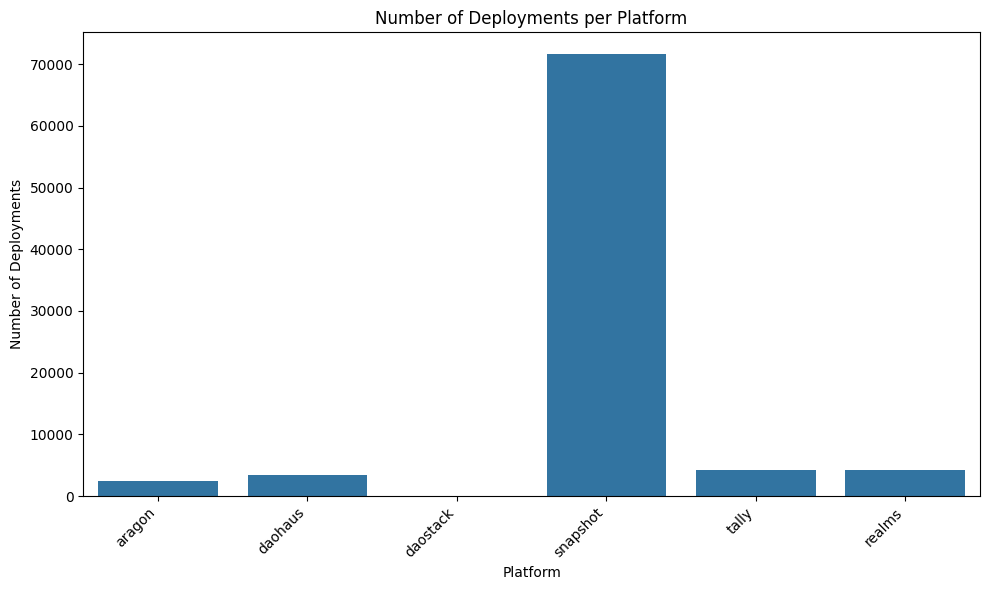

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

deployment_data = melted_summary_df[melted_summary_df['Count Type'] == 'Deployments']

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Count', data=deployment_data)
plt.xlabel('Platform')
plt.ylabel('Number of Deployments')
plt.title('Number of Deployments per Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Generate proposal plot

### Subtask:
Create a bar plot showing the number of proposals for each platform.


**Reasoning**:
Filter the dataframe to get the proposal counts, then create and display a bar plot with appropriate labels and rotation for readability.



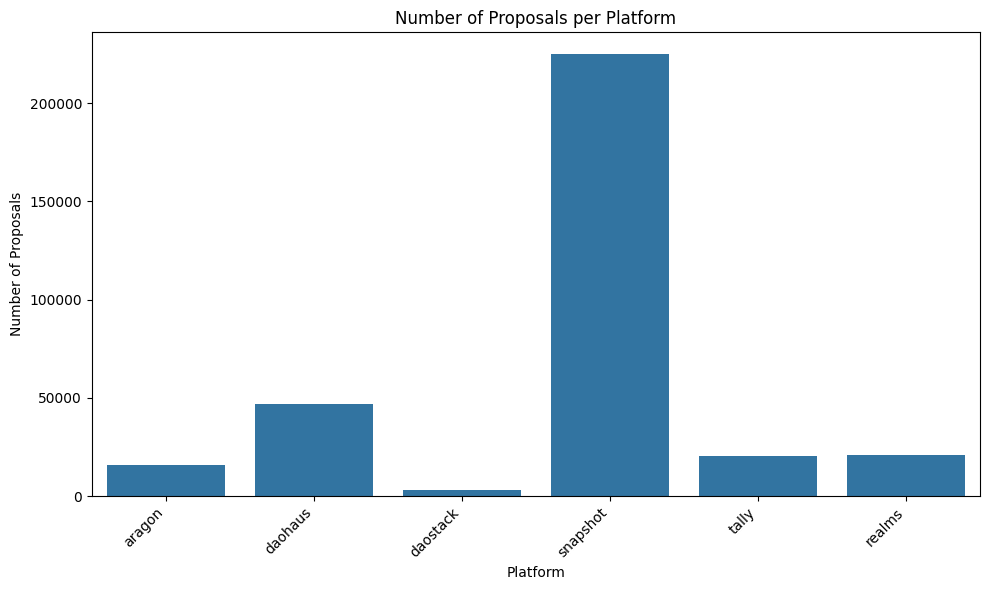

In [ ]:
proposal_data = melted_summary_df[melted_summary_df['Count Type'] == 'Proposals']

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Count', data=proposal_data)
plt.xlabel('Platform')
plt.ylabel('Number of Proposals')
plt.title('Number of Proposals per Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Generate vote plot

### Subtask:
Create a bar plot showing the number of votes for each platform.


**Reasoning**:
Filter the data for votes and create a bar plot to visualize the number of votes per platform.



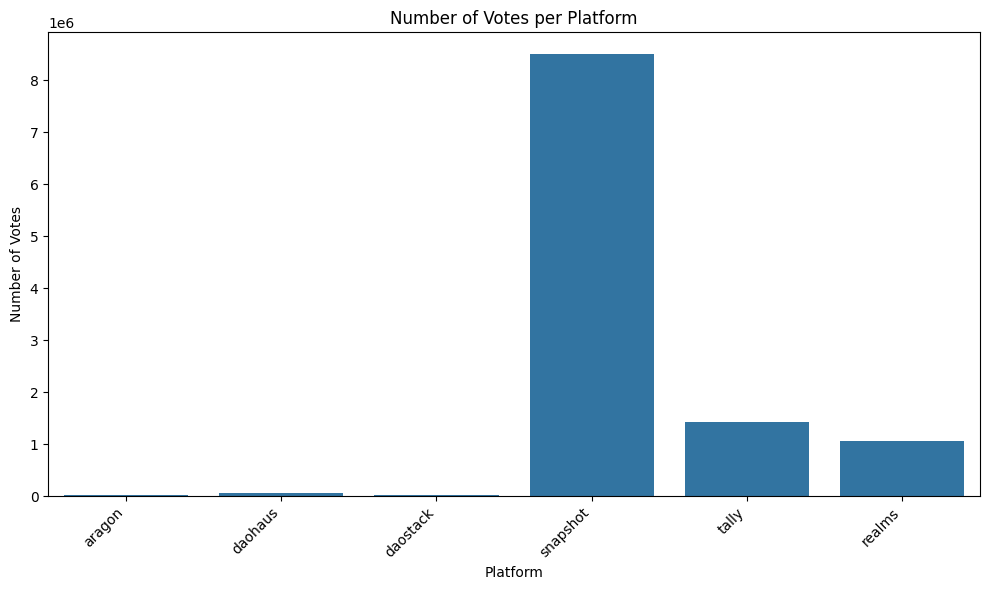

In [ ]:
vote_data = melted_summary_df[melted_summary_df['Count Type'] == 'Votes']

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Count', data=vote_data)
plt.xlabel('Platform')
plt.ylabel('Number of Votes')
plt.title('Number of Votes per Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data was successfully transformed from a wide format to a long format, which is suitable for generating the requested plots.
*   Three bar plots were generated visualizing the number of deployments, proposals, and votes per platform.
*   The plots include appropriate titles, axis labels, and rotated x-axis labels for improved readability.

### Insights or Next Steps

*   Analyze the generated plots to identify which platforms have the highest counts for deployments, proposals, and votes.
*   Consider creating a single plot that shows all three counts side-by-side for each platform to facilitate easier comparison.


# Task
Analyze the structure, missing values, and distribution of the data in "/content/drive/MyDrive/Egalitarian DAOs/datasets/data used in census/deployments.csv", "/content/drive/MyDrive/Egalitarian DAOs/datasets/data used in census/proposals.csv", and "/content/drive/MyDrive/Egalitarian DAOs/datasets/data used in census/votes.csv". Create a summary table showing the number of deployments, proposals, and votes per platform from the new data, and compare the deployment counts with the previously analyzed data.

## Load new data

### Subtask:
Load the `deployments.csv`, `proposals.csv`, and `votes.csv` files from the `/content/drive/MyDrive/Egalitarian DAOs/datasets/data used in census/` directory.


**Reasoning**:
Define the directory path and file paths, then load the CSV files into DataFrames.



In [20]:
census_data_path = '/content/drive/MyDrive/Egalitarian DAOs/datasets/data used in census/'
deployments_census_file = os.path.join(census_data_path, 'deployments.csv')


deployments_census_df = pd.read_csv(deployments_census_file)

In [22]:
# Calculate deployment counts from the census data
deployment_counts_census = deployments_census_df['platform'].value_counts().reset_index()
deployment_counts_census.columns = ['Platform', 'Deployment count (census)']

# Get the deployment counts from the initial summary table
previous_deployment_summary = summary_df[['Deployments']].reset_index()
previous_deployment_summary.columns = ['Platform', 'Deployment count (current)']

# Merge the two dataframes on the 'Platform' column
comparison_df = pd.merge(previous_deployment_summary, deployment_counts_census, on='Platform', how='outer').fillna(0)

print("Comparison of Deployment Counts:")
display(comparison_df)

Comparison of Deployment Counts:


,Platform,Deployment count (current),Deployment count (census)
0,aragon,2402,460
1,daohaus,3459,391
2,daostack,58,33
3,realms,4224,361
4,snapshot,71585,8688
5,tally,4219,608
